In [1]:
# Import the required libraries
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# portfolio tickers
assets = ["JCI", "TGT", "CMCSA", "CPB", "MO", "APA", "MMC", "JPM",
          "ZION", "PSA", "BAX", "BMY", "LUV", "PCAR", "TXT", "TMO",
          "DE", "MSFT", "HPQ", "SEE", "VZ", "CNP", "NI", "T", "BA"]

# sort tickers
assets.sort()

#download data
data = yf.download(assets, start="2016-01-01", end="2019-12-30")

# compute non-compounding, daily returns
returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  25 of 25 completed


In [3]:
# setup a portfolio with equal risk weights. 
# This means Riskfolio-Lib will find the weights that cause the risk contribution of each stock to be equal.

port = rp.Portfolio(returns=returns)

port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)

w_rp = port.rp_optimization(
    # use historical
    model="Classic",
    # use mean-variance optimization
    rm="MV",  
    # use historical scenarios
    hist=True,  
    # set risk free rate to 0
    rf=0,  
    # don't use constraints
    b=None  
)

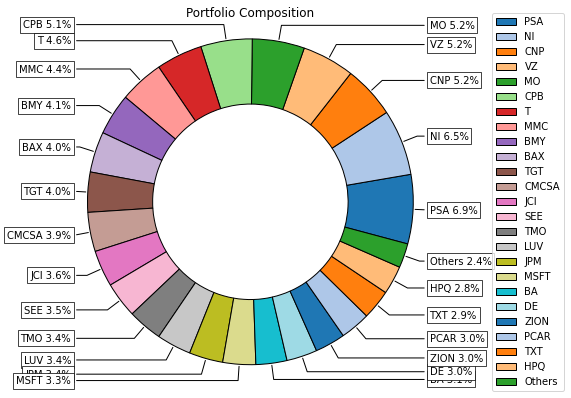

In [4]:
# Riskfolio-Lib makes it easy to visualize the weights.

ax = rp.plot_pie(w=w_rp)

# Save the figure.
plt.savefig(f"./Images/portfolioComposition.jpg")

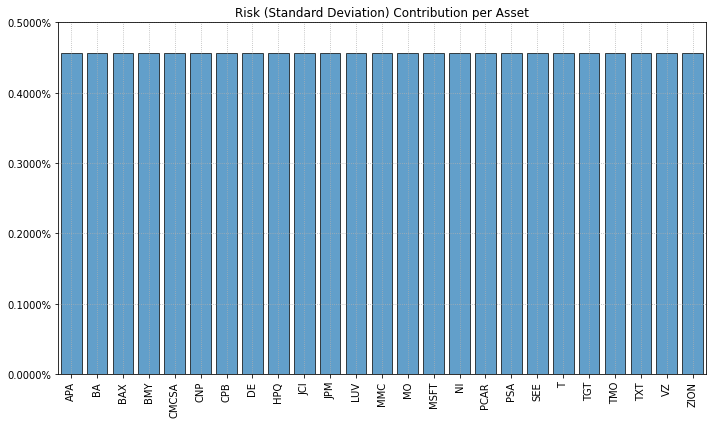

In [5]:
# risk contributions.

# show the risk contribution for each asset is equal
ax = rp.plot_risk_con(
    w_rp,
    cov=port.cov,
    returns=port.returns,
    rm="MV",
    rf=0,
)

# Save the figure.
plt.savefig(f"./Images/riskContribution.jpg")

They’re equal! That’s exactly what to expect.

In [6]:
# Create a portfolio with a minimum return constraint

port.lowerret = 0.0008

# estimate the optimal portfolio with risk parity with the constraint
w_rp_c = port.rp_optimization(
    # use historical
    model="Classic", 
    # use mean-variance optimization
    # use historical scenarios
    rm="MV",  
    # use historical scenarios
    hist=True,  
    # set risk free rate to 0
    rf=0,  
    # don't use constraints
    b=None  
)


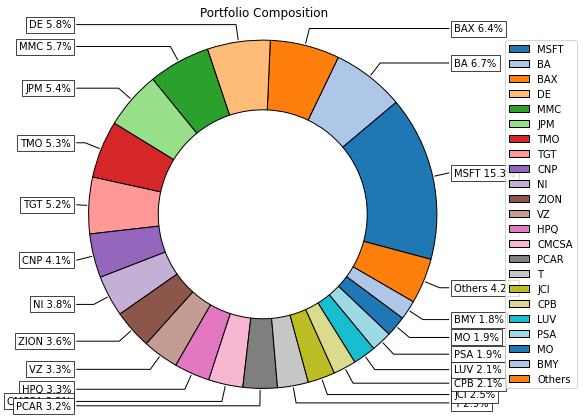

In [7]:
# Add a constraint for the minimum level of expected returns for the entire portfolio.

ax = rp.plot_pie(w=w_rp_c)

# Save the figure.
plt.savefig(f"./Images/minLevelPortfolioComposition.jpg")

MSFT dominates with a 15.3% weight. That’s because to reach the minimum return threshold, risk parity overweights stocks with higher risk. And with higher risk comes higher return.

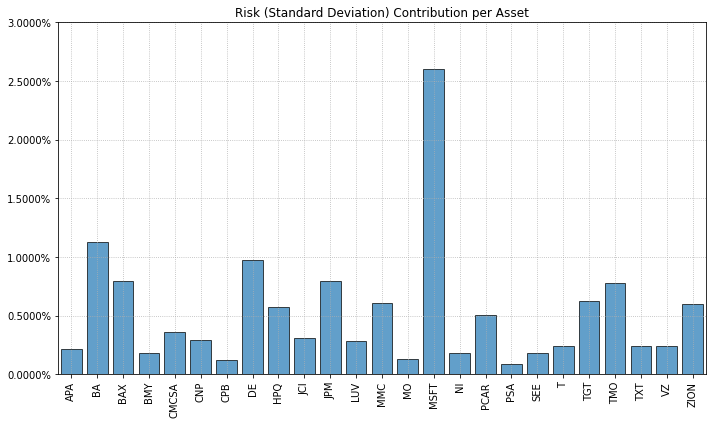

In [8]:
# Plot the risk contributions.

ax = rp.plot_risk_con(
    w_rp_c,
    cov=port.cov,
    returns=port.returns,
    rm="MV",
    rf=0,
)

# Save the figure.
plt.savefig(f"./Images/minLevelRiskContribution.jpg")

They’re no longer equal. That’s because risk parity figured out the optimal risk weights to hit the minimum portfolio return constraint.

Risk parity is a great way to manage a predictable portfolio that performs consistently in most markets.